In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as sns

In [2]:
# Importing the dataset

cars_df = pd.read_csv('cars-dataset.csv')
cars_df.head(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


#### EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [3]:
#shape of dataset
cars_df.shape

(398, 8)

In [4]:
#datatypes of columns
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [5]:
# replace ?
cars_df = cars_df.replace('?',np.nan)

In [6]:
#are there any missing data ?
cars_df.isnull().values.any() 

True

In [7]:
#drop the missing row as of now
cars_df_removedNA = cars_df.dropna()

In [8]:
cars_df_removedNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null object
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 27.6+ KB


In [9]:
cars_df_removedNA['hp']= pd.to_numeric(cars_df_removedNA['hp'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
cars_df_removedNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null int64
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 27.6+ KB


In [11]:
#since car names are not significant for analysis, we can drop them.
cars_df = cars_df_removedNA.drop(cars_df_removedNA.columns[0], axis=1)
cars_df.head(5)

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0


#### Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


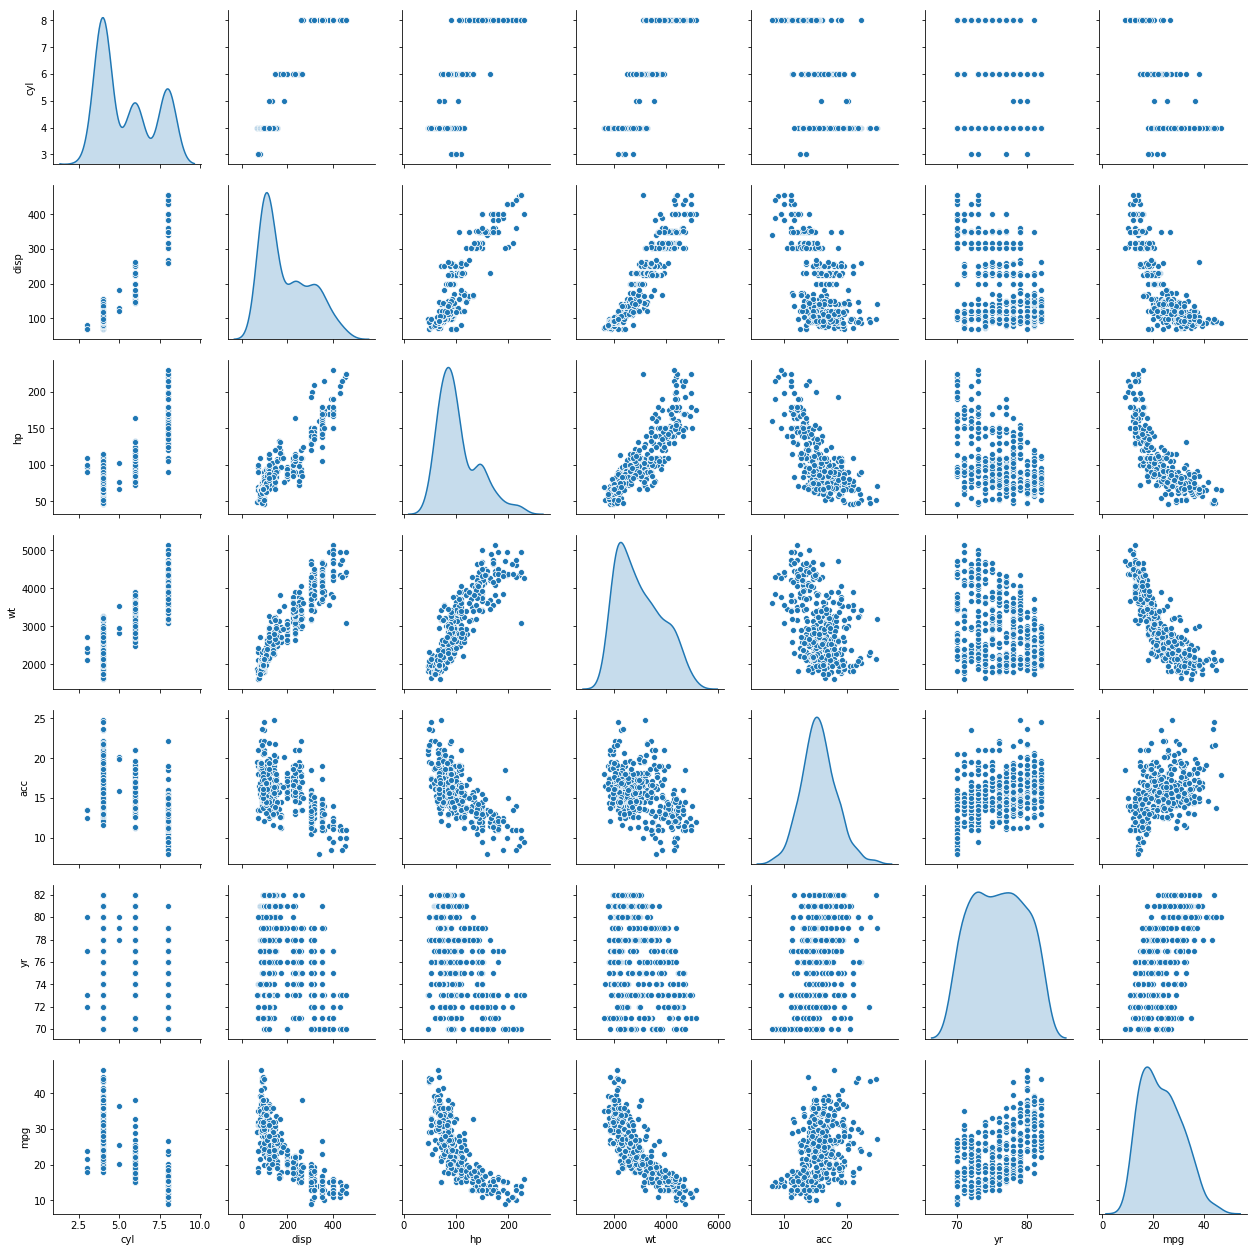

In [12]:
sns.pairplot(cars_df, diag_kind='kde')

From the pair plot we get to see maximum of 3 gausian curves. So we expect to get arround 3 clusters

#### Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

##### KMeans Clustering

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [14]:
cluster_range = range( 2, 6) #from pair plot we expect 3 cluster, so we take a range of 2-6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init = 5)
    clusters.fit(cars_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
    cluster_sil_scores.append(metrics.silhouette_score(cars_df, labels, metric='euclidean'))
    
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,7.292105e+07,0.636661
1,3,3.384903e+07,0.585181
2,4,1.881093e+07,0.578590
3,5,1.350093e+07,0.554896


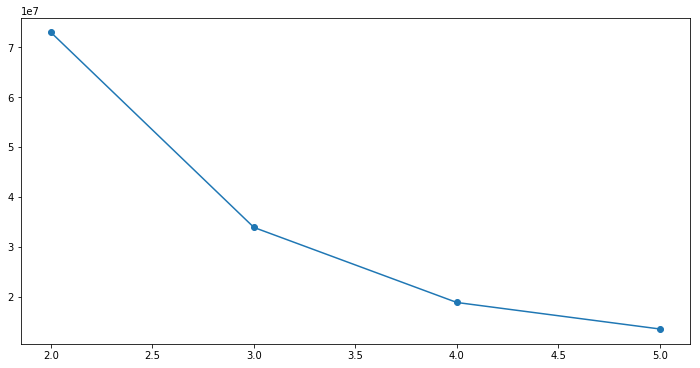

In [15]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

From the elbow plot its evident that at 3 we get a bend in the elbow

In [16]:
cluster = KMeans( n_clusters = 3, random_state = 1 )
cluster.fit(cars_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [17]:
prediction=cluster.predict(cars_df)
cars_df["GROUP"] = prediction

In [18]:
cars_df.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,90,90,90,90,90,90,90
1,122,122,122,122,122,122,122
2,180,180,180,180,180,180,180


In [19]:
cars_df_0 = cars_df.groupby("GROUP").get_group(0)
cars_df_0.shape

(90, 8)

In [20]:
cars_df_1 = cars_df.groupby("GROUP").get_group(1)
cars_df_1.shape

(122, 8)

In [21]:
cars_df_2 = cars_df.groupby("GROUP").get_group(2)
cars_df_2.shape

(180, 8)

#### Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [22]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
x = cars_df_0.drop(['mpg'],axis=1)
y = cars_df_0['mpg']

In [24]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [25]:
L0_Model = LinearRegression()
L0_Model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, L0_Model.coef_[idx]))

The coefficient for cyl is -0.12021842435884303
The coefficient for disp is 0.012871771106534
The coefficient for hp is -0.021146545473681812
The coefficient for wt is -0.0032268531896057304
The coefficient for acc is -0.009988505485651923
The coefficient for yr is 0.38514734035189463
The coefficient for GROUP is 0.0


For Group 1 cars

In [27]:
x = cars_df_1.drop(['mpg'],axis=1)
y = cars_df_1['mpg']

In [28]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [29]:
L1_Model = LinearRegression()
L1_Model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, L1_Model.coef_[idx]))

The coefficient for cyl is -0.382296794640438
The coefficient for disp is 0.005072902999324969
The coefficient for hp is -0.052142611432922245
The coefficient for wt is -0.0037843968334745673
The coefficient for acc is -0.11404278467306672
The coefficient for yr is 0.6767092077985213
The coefficient for GROUP is 0.0


For Group 2 Cars

In [31]:
x = cars_df_2.drop(['mpg'],axis=1)
y = cars_df_2['mpg']

In [32]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [33]:
L2_Model = LinearRegression()
L2_Model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, L1_Model.coef_[idx]))

The coefficient for cyl is -0.382296794640438
The coefficient for disp is 0.005072902999324969
The coefficient for hp is -0.052142611432922245
The coefficient for wt is -0.0037843968334745673
The coefficient for acc is -0.11404278467306672
The coefficient for yr is 0.6767092077985213
The coefficient for GROUP is 0.0
